In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from IPython.display import display

In [32]:
data = pd.read_csv("data.csv", header = None)
gender_distribution = data.iloc[:, 0].value_counts().reset_index() 
gender_distribution['%'] = ((gender_distribution['count'] / len(data)) * 100).round(2)
gender_distribution.columns = [' ', 'count', '%']
gender_distribution[' '] = gender_distribution[' '].replace({'M': 'Male', 'I': 'Infant', 'F': 'Female'})

In [33]:
gender_distribution = gender_distribution.set_index(' ')
gender_distribution

,count,%
,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [34]:
# Przypisz do DataFrame tylko te kolumny od drugiej do ostatniej
data_statistics = data.iloc[:, 1:]

In [35]:
data_statistics.columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
stats = pd.DataFrame()
for column in data_statistics.columns:
    mean = data_statistics[column].mean()
    std = data_statistics[column].std()
    minimum = data_statistics[column].minimum()
    Q1 = data_statistics[column].quantile(0.25)
    Q2 = data_statistics[column].quantile(0.5)
    Q3 = data_statistics[column].quantile(0.75)
    maximum = data_statistics[column].maximum()
    stats.loc[column, 'mean'] = mean
    stats.loc[column, 'std'] = std
    stats.loc[column, 'min'] = minimum
    stats.loc[column, '25%'] = Q1
    stats.loc[column, '50%'] = Q2
    stats.loc[column, '75%'] = Q3
    stats.loc[column, 'max'] = maximum

stats

,mean,std,min,25%,50%,75%,max
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


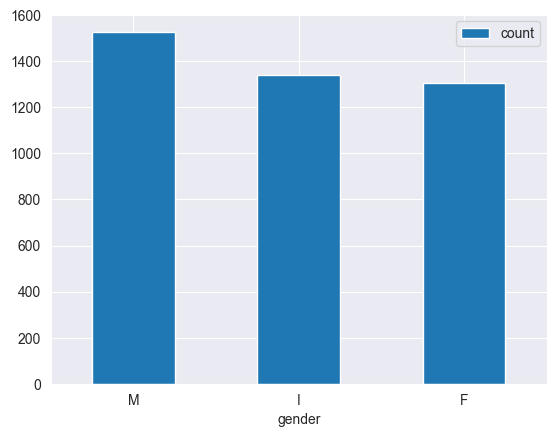

In [36]:
qualitative = data.iloc[:, 0].value_counts().reset_index()
qualitative.columns = ['gender', 'count']
bar_chart = qualitative.plot.bar(x = 'gender', y = 'count', rot = 0) #rot=0 jesli nie podane = 0

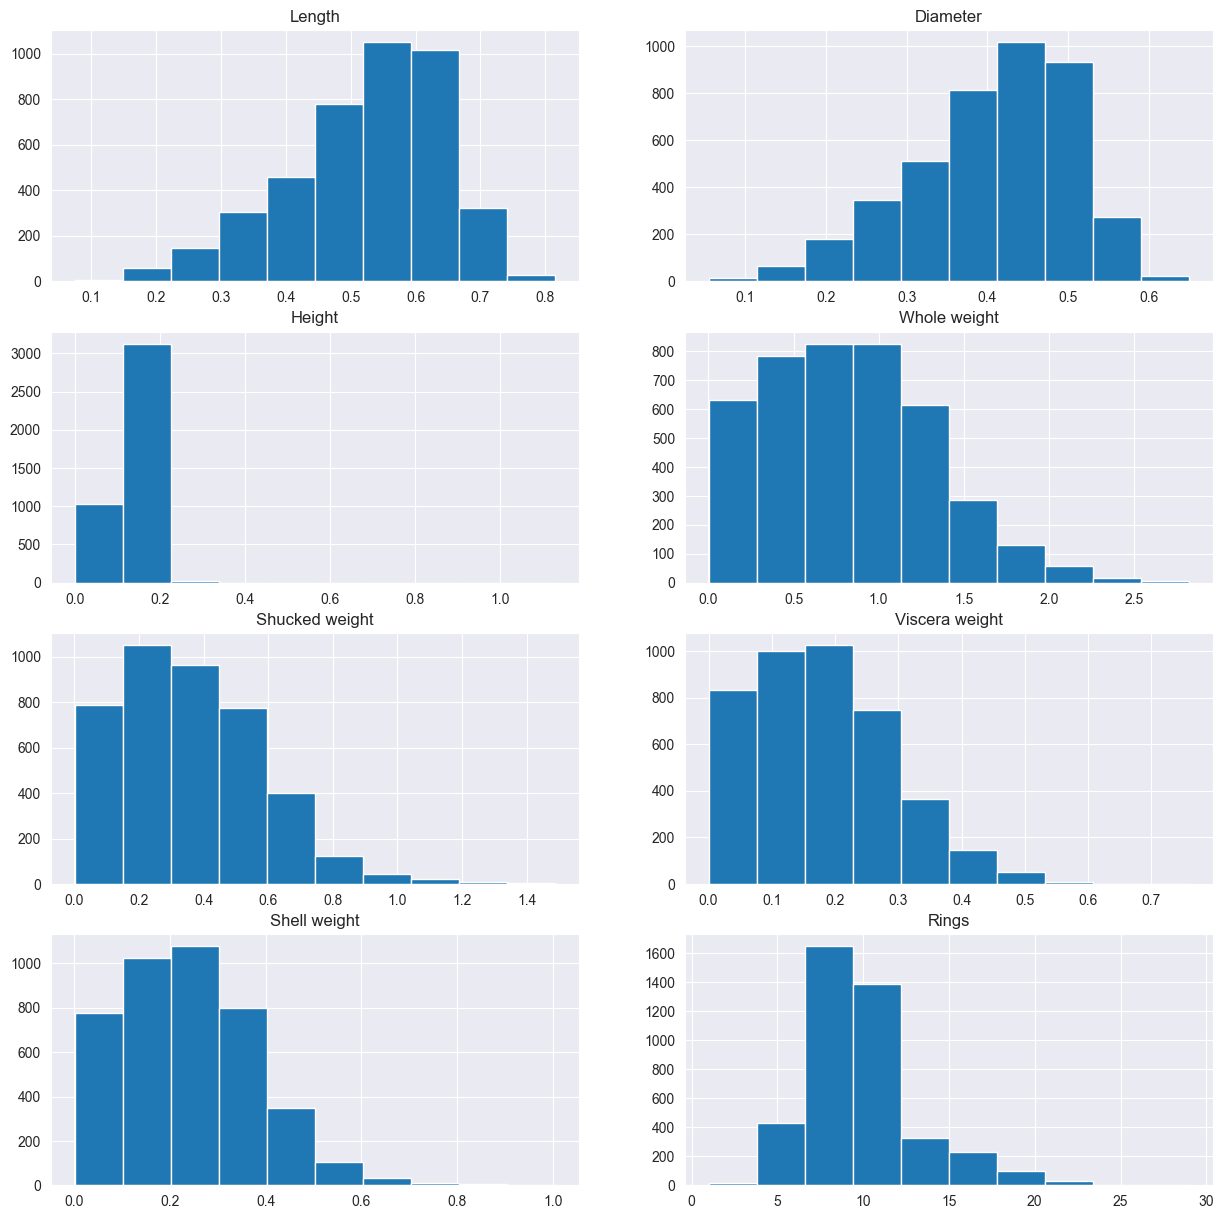

In [37]:
figure, axes = plt.subplots(4, 2, figsize = (15,15))
for i, quantitative in enumerate(data_statistics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    data_statistics[quantitative].hist(ax = ax)
    ax.set_title(quantitative)
plt.show()

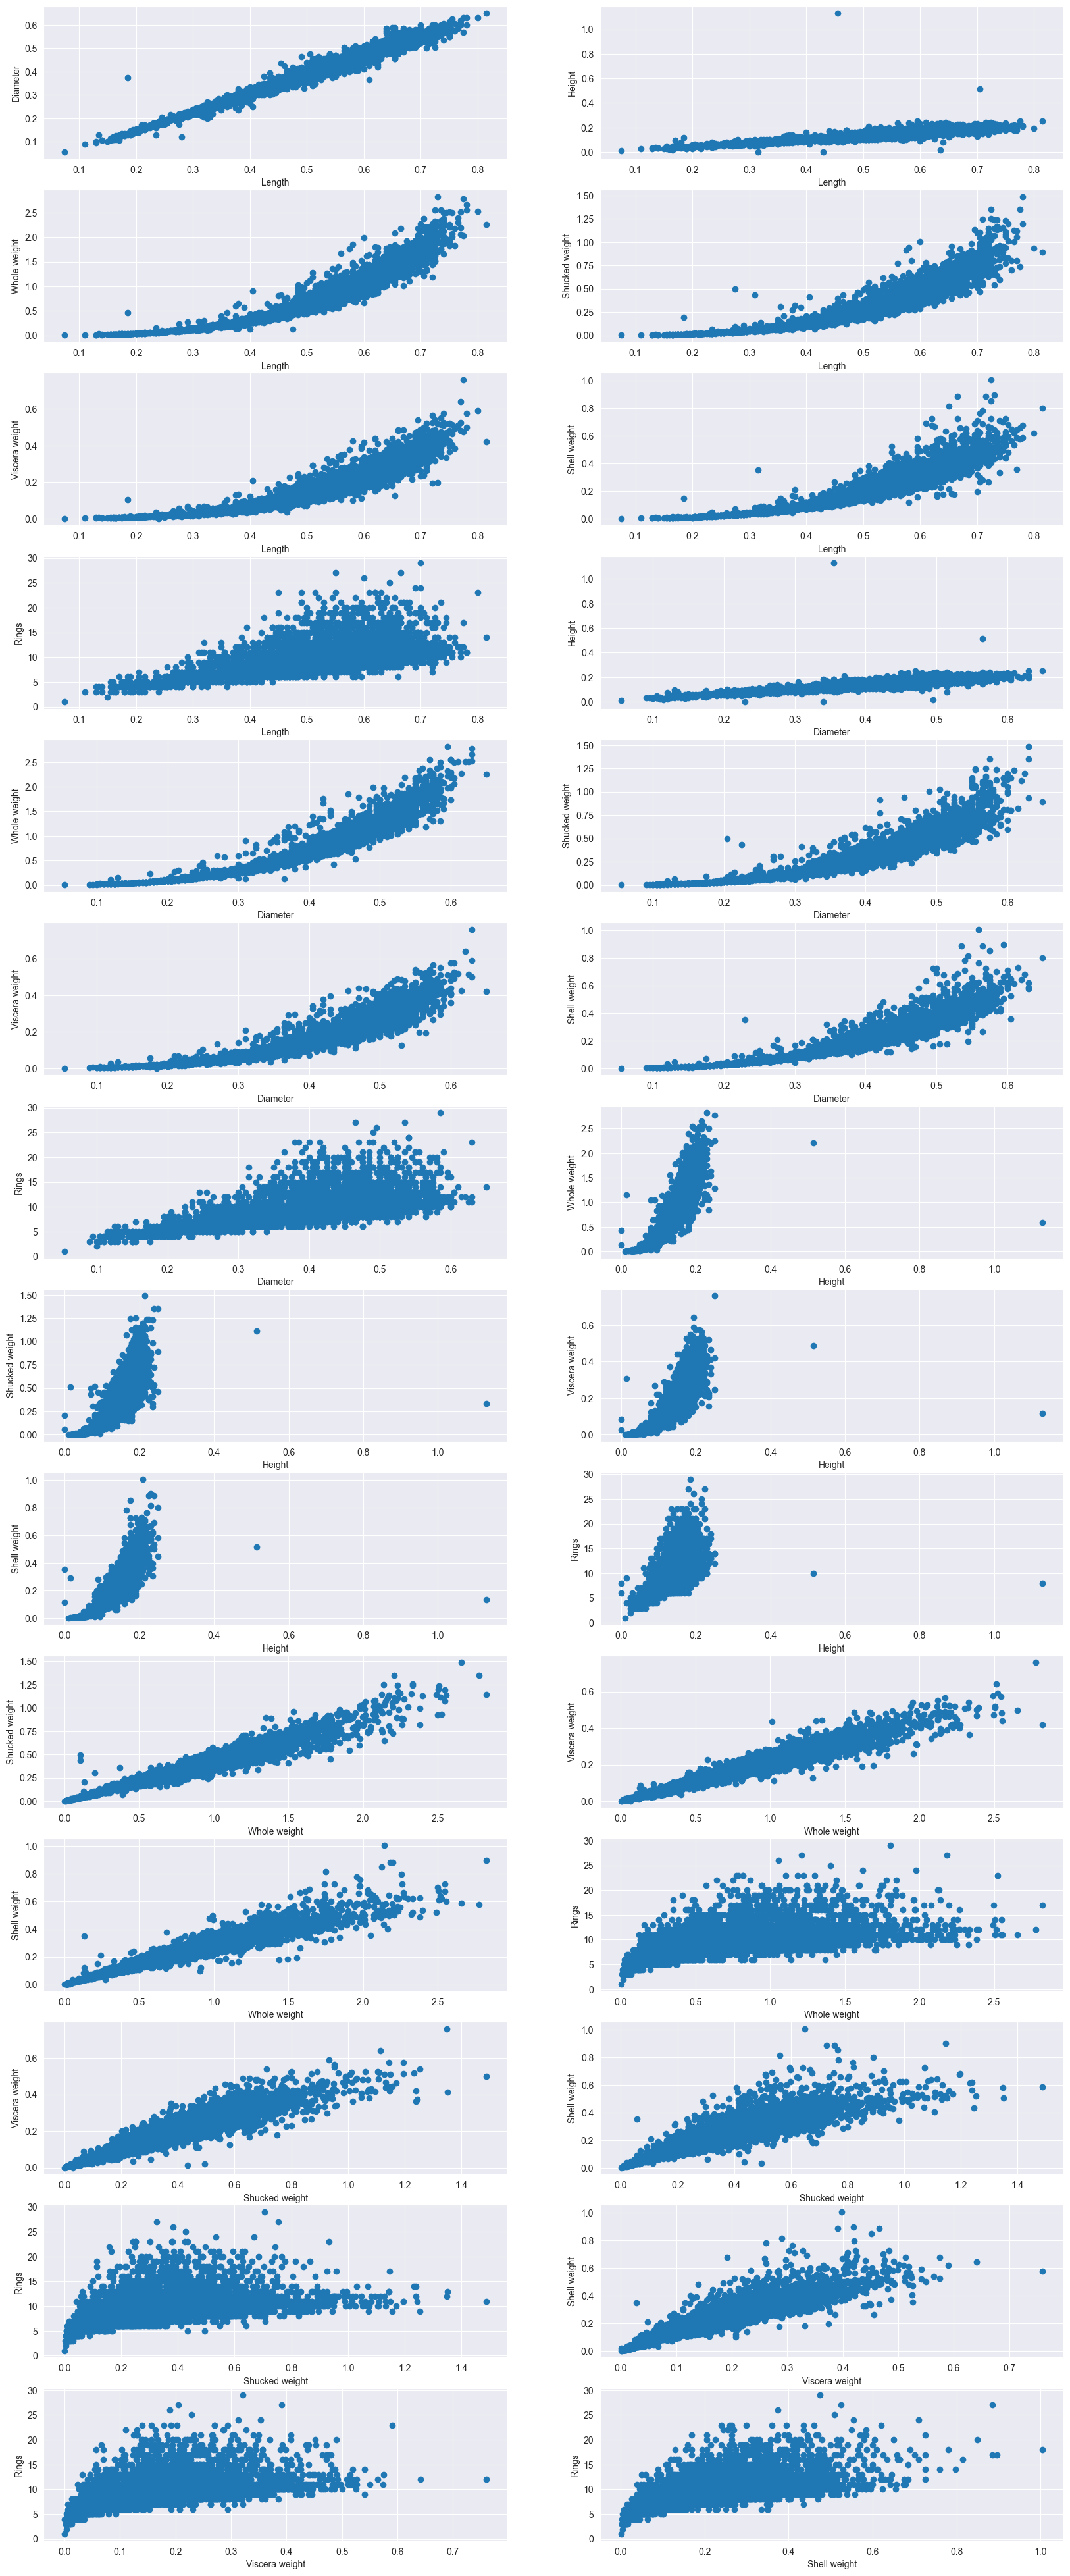

In [38]:
pairs = list(itertools.combinations(data_statistics, 2))
figure, axes = plt.subplots(14, 2, figsize = (20, 50))

for i, (q1, q2) in enumerate(pairs):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.scatter(data_statistics[q1], data_statistics[q2])
    ax.set_xlabel(q1)
    ax.set_ylabel(q2)


plt.show()
    

In [39]:
data_statistics.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

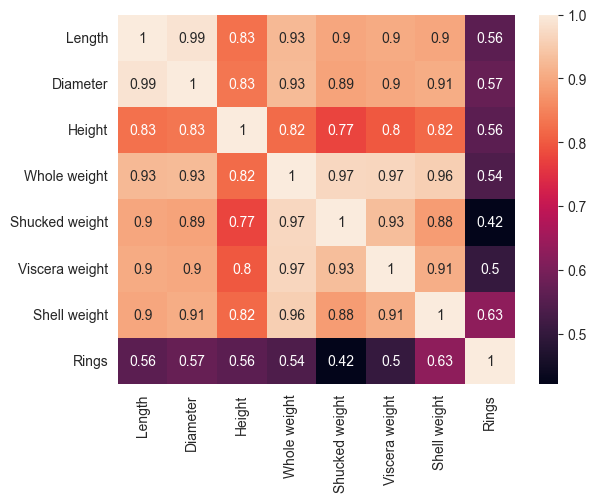

In [40]:
sns.heatmap(data_statistics.corr(), annot=True)

In [41]:
#the most correlated values are the length and diameter because of the highest absolute value of correlation

<Axes: xlabel='Length', ylabel='Diameter'>

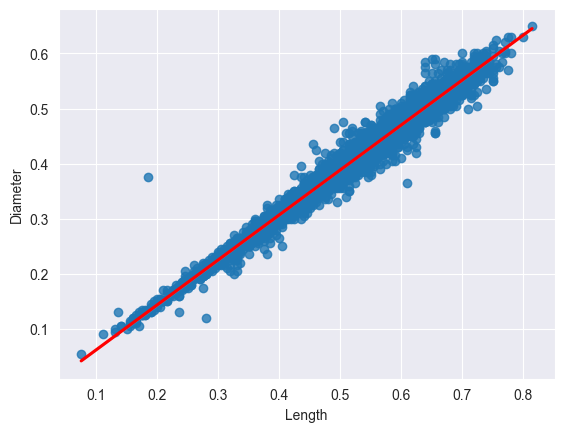

In [42]:
sns.regplot(x = data_statistics['Length'], y = data_statistics['Diameter'],line_kws={'color': 'red'})

In [43]:
stats = pd.DataFrame()

gender_mapping = {'M': 'Male', 'F': 'Female', 'I': 'Infant'}

for column in data_statistics.columns:
    for gender_code, gender_name in gender_mapping.items():
        gender_data = data_statistics[data.iloc[:, 0] == gender_code][column]
        mean = gender_data.mean()
        std = gender_data.std()
        min_val = gender_data.minimum()
        Q1 = gender_data.quantile(0.25)
        Q2 = gender_data.median()
        Q3 = gender_data.quantile(0.75)
        max_val = gender_data.maximum()

        temp_df = pd.DataFrame({
            'feature': [column],
            'gender': [gender_name],
            'mean': [mean],
            'std': [std],
            'min': [min_val],
            '25%': [Q1],
            '50%': [Q2],
            '75%': [Q3],
            'max': [max_val]
        })

        stats = pd.concat([stats, temp_df], ignore_index=True)

stats.set_index(['feature', 'gender'], inplace=True)

display(stats)


mean       std     min       25%       50%  \
feature        gender                                                    
Length         Male     0.561391  0.102697  0.1550  0.505000   0.58000   
               Female   0.579093  0.086160  0.2750  0.525000   0.59000   
               Infant   0.427746  0.108858  0.0750  0.360000   0.43500   
Diameter       Male     0.439287  0.084398  0.1100  0.395000   0.45500   
               Female   0.454732  0.070954  0.1950  0.410000   0.46500   
               Infant   0.326494  0.088109  0.0550  0.270000   0.33500   
Height         Male     0.151381  0.034804  0.0250  0.130000   0.15500   
               Female   0.158011  0.039984  0.0150  0.140000   0.16000   
               Infant   0.107996  0.031995  0.0000  0.085000   0.11000   
Whole weight   Male     0.991459  0.470581  0.0155  0.671625   0.97575   
               Female   1.046532  0.430316  0.0800  0.730000   1.03850   
               Infant   0.431363  0.286275  0.0020  0.205500   0.38400   
Shucked weight Male     0.432946  0.223000  0.0065  0.276375   0.42175   
               Female   0.446188  0.198663  0.0310  0.295000   0.44050   
               Infant   0.191035  0.128405  0.0010  0.090000   0.16975   
Viscera weight Male     0.215545  0.104919  0.0030  0.145875   0.21000   
               Female   0.230689  0.097617  0.0210  0.159000   0.22400   
               Infant   0.092010  0.062536  0.0005  0.042500   0.08050   
Shell weight   Male     0.281969  0.130834  0.0050  0.190000   0.27600   
               Female   0.302010  0.125649  0.0250  0.213250   0.29500   
               Infant   0.128182  0.084927  0.0015  0.064125   0.11300   
Rings          Male    10.705497  3.026349  3.0000  9.000000  10.00000   
               Female  11.129304  3.104256  5.0000  9.000000  10.00000   
               Infant   7.890462  2.511554  1.0000  6.000000   8.00000   

                             75%      max  
feature        gender                      
Length         Male     0.630000   0.7800  
               Female   0.640000   0.8150  
               Infant   0.510000   0.7250  
Diameter       Male     0.500000   0.6300  
               Female   0.505000   0.6500  
               Infant   0.390000   0.5500  
Height         Male     0.175000   0.5150  
               Female   0.175000   1.1300  
               Infant   0.130000   0.2200  
Whole weight   Male     1.265625   2.8255  
               Female   1.320250   2.6570  
               Infant   0.599375   2.0495  
Shucked weight Male     0.566000   1.3510  
               Female   0.573250   1.4880  
               Infant   0.270375   0.7735  
Viscera weight Male     0.278000   0.7600  
               Female   0.297250   0.5900  
               Infant   0.130000   0.4405  
Shell weight   Male     0.355500   0.8970  
               Female   0.375000   1.0050  
               Infant   0.178500   0.6550  
Rings          Male    12.000000  27.0000  
               Female  12.000000  29.0000  
               Infant   9.000000  21.0000

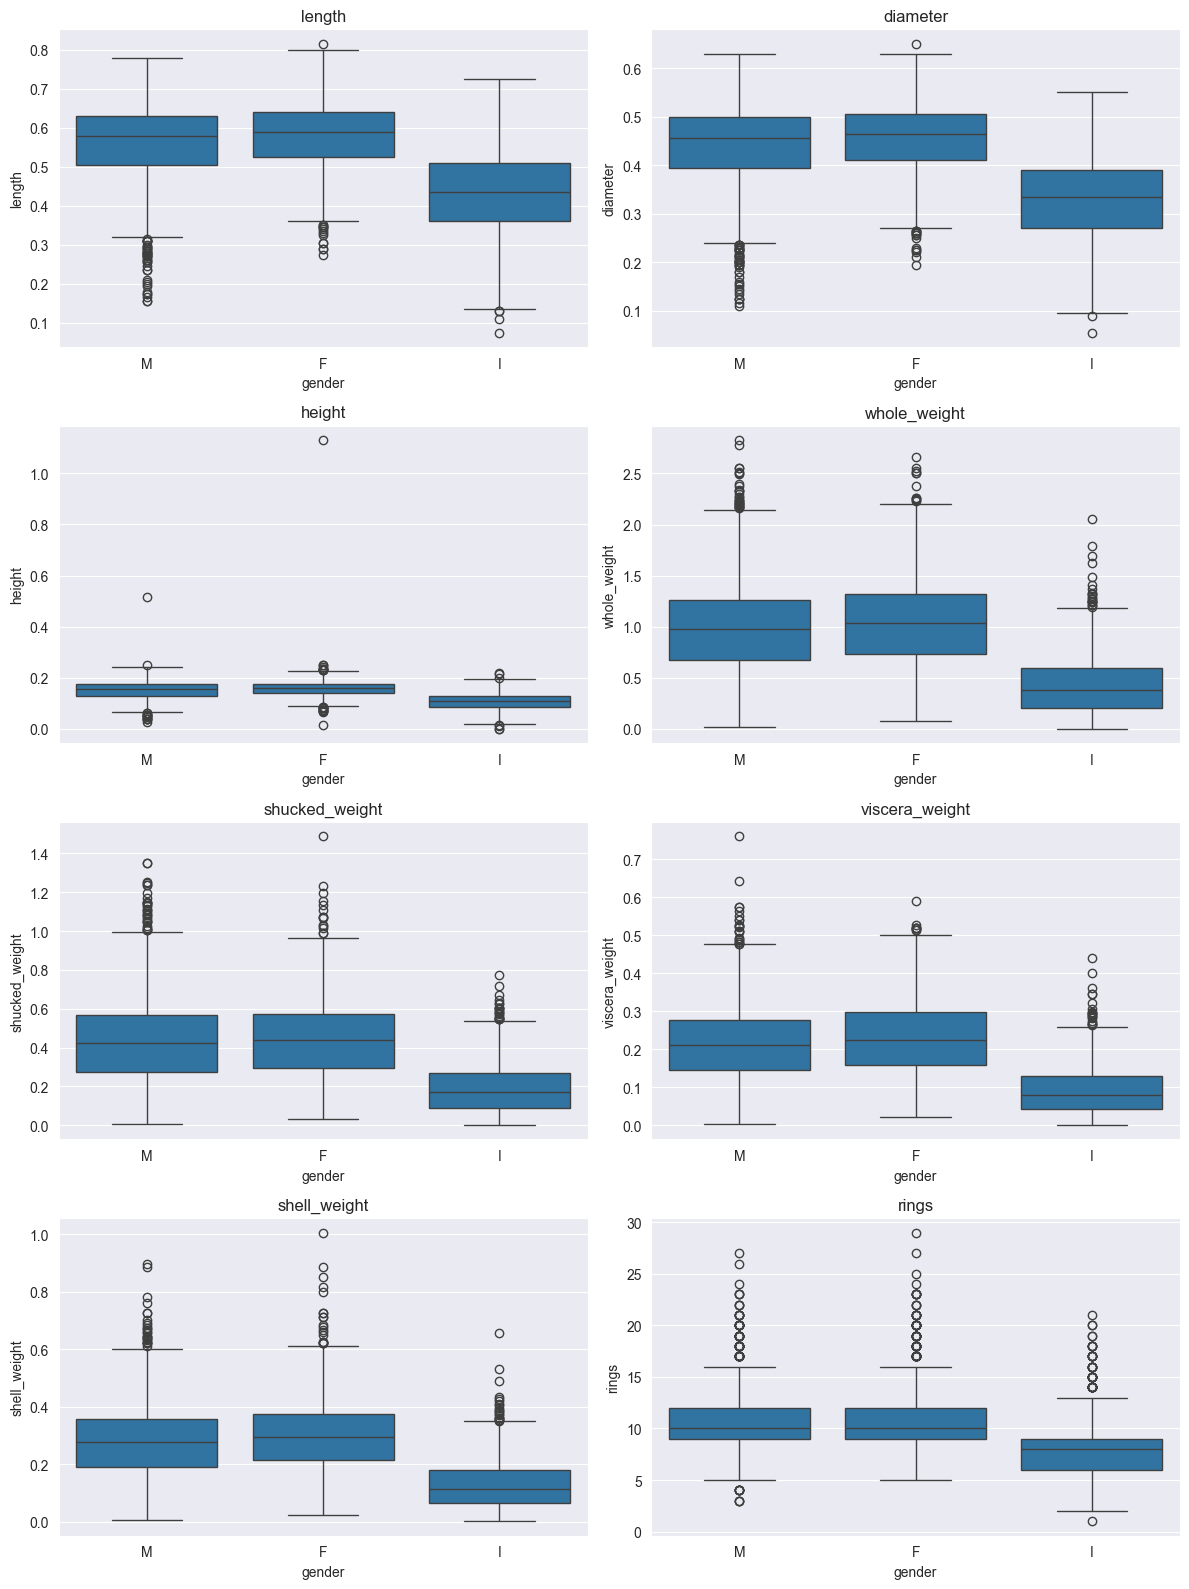

In [44]:
data = pd.read_csv('data.csv', header=None, names=['gender', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'])

fig, axes = plt.subplots(4,2, figsize=(12, 16))

for i, column in enumerate(data.columns[1:]):
    sns.boxplot(x='gender', y=column, data=data, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)


plt.tight_layout()
plt.show()